<a href="https://colab.research.google.com/github/RMNT/toai_d_class/blob/master/toai_class_d_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


##Imports

In [ ]:
import pandas as pd
!pip install geopandas
!pip install python-varname
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from functools import reduce
from varname import nameof
import seaborn as sns
import re

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
%cd 'drive/My Drive/World Happiness Report'

/content/drive/My Drive/World Happiness Report



## Importing data

In [ ]:
whr_2015 = pd.read_csv('2015.csv')
whr_2016 = pd.read_csv('2016.csv')
whr_2017 = pd.read_csv('2017.csv')
whr_2018 = pd.read_csv('2018.csv')
whr_2019 = pd.read_csv('2019.csv')
whr_2020 = pd.read_csv('2020.csv')

country_bn = gpd.read_file('World_Countries__Generalized_.shx')

In [ ]:
''' whr_2015.reset_index(drop=True, inplace=True)
whr_2016.reset_index(drop=True, inplace=True)
whr_2017.reset_index(drop=True, inplace=True)
whr_2018.reset_index(drop=True, inplace=True)
whr_2019.reset_index(drop=True, inplace=True)
whr_2020.reset_index(drop=True, inplace=True); '''

' whr_2015.reset_index(drop=True, inplace=True)\nwhr_2016.reset_index(drop=True, inplace=True)\nwhr_2017.reset_index(drop=True, inplace=True)\nwhr_2018.reset_index(drop=True, inplace=True)\nwhr_2019.reset_index(drop=True, inplace=True)\nwhr_2020.reset_index(drop=True, inplace=True); '

In [ ]:
all_whr = [whr_2015, whr_2016, whr_2017, whr_2018, whr_2019, whr_2020]

## Functions

In [ ]:
def nan_number(dfs):
  nans = 0
  for df in dfs:
    nans = nans + len(df[df.isna().any(axis=1)])
  return nans


def delete_nans(dfs):
  for df in dfs:
    df.dropna(inplace=True)


def not_needed_countries(geocountry, happiness_df):
  countries = []
  for country in geocountry.to_list():
    if country not in happiness_df:
      countries.append(country)
  return countries


def delete_rows(df, rows):
  for index, row in df.iterrows():
    if row.Country in rows:
      df.drop(index, inplace=True)
  df.reset_index(inplace=True)
  #df.drop('Index', axis=1)
  return df


def all_countries(dfs, col_name):
  countries = []
  for df in dfs:
    for iter, row in df.iterrows():
      if df.loc[iter, col_name] not in countries:
        countries.append(df.loc[iter, col_name])
  return countries


def leftout_countries(df, col_name, all_countries):
  unnoticed = []
  accepted_countries = df.loc[:, col_name].tolist()
  for country in all_countries:
    if country not in accepted_countries:
      unnoticed.append(country)
  return unnoticed

def add_years(dfs, dates):
  curr = 0
  ''' for df in dfs:
    print(nameof(df)) '''
  final_df['Date'] = ""
  for iter, row in final_df.iterrows():
    if iter == 0:
      final_df.at[iter, 'Date'] = dates.get(curr)
    elif iter == length-1:
      final_df.at[iter, 'Date'] = dates.get(curr)
      break;
    else:
      if final_df.iloc[iter]['Happiness Rank'] <= final_df.iloc[iter+1]['Happiness Rank']:
        final_df.at[iter, 'Date'] = dates.get(curr)
      else:
        curr = curr + 1
        final_df.at[iter, 'Date'] = dates.get(curr)

  return final_df


def add_color(df, color):
  df['Color'] = ""
  color = int(color.replace('#', '0x'), 16)
  print("color: " + str(color))
  for iter, row in df.iterrows():
    df.at[iter, 'Color'] = hex(color)
    color = color-5
  return df


def get_country_rows(dfs, col_name, country, columns):
  country_rows = pd.DataFrame(columns=columns)
  cnt = 0
  #whr = re.search("(whr_)\d+/g", txt)
  for  df in dfs:
    for iter, row in df.iterrows():
      if row[col_name] == country:
        country_rows.loc[cnt] = row
        cnt = cnt + 1
  return country_rows[columns]
''' def repeating elements(lists):
  rep = []
  count = 1
  for index, ls in enumerate(lists):
    for col_name in ls:
      if col_name in count<=len(lists) and lists[index+count]:
        count = count+1 '''

' def repeating elements(lists):\n  rep = []\n  count = 1\n  for index, ls in enumerate(lists):\n    for col_name in ls:\n      if col_name in count<=len(lists) and lists[index+count]:\n        count = count+1 '

## Data exploration

In [ ]:
print(len(whr_2015))
print(len(whr_2016))
print(len(whr_2017))
print(len(whr_2018))
print(len(whr_2019))
print(len(whr_2020))

158
157
155
156
156
153


In [ ]:
whr_2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [ ]:
print("2015: " + str(whr_2015.columns))
print("2016: " + str(whr_2016.columns))
print("2017: " + str(whr_2017.columns))
print("2018: " + str(whr_2018.columns))
print("2019: " + str(whr_2019.columns))
print("2020: " + str(whr_2020.columns))

2015: Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
2016: Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
2017: Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
2018: Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life 

In [ ]:
whr_2020

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


In [ ]:
country_bn

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
0,1,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
1,2,United States Minor Outlying Islands,UM,United States,US,0.480216,0.003216,"MULTIPOLYGON (((-160.02114 -0.39805, -160.0281..."
2,3,Cook Islands,CK,New Zealand,NZ,0.980664,0.013073,"MULTIPOLYGON (((-159.74698 -21.25667, -159.793..."
3,4,French Polynesia,PF,France,FR,3.930211,0.175332,"MULTIPOLYGON (((-149.17920 -17.87084, -149.258..."
4,5,Niue,NU,New Zealand,NZ,0.541413,0.021414,"POLYGON ((-169.89389 -19.14556, -169.93088 -19..."
...,...,...,...,...,...,...,...,...
244,245,Northern Mariana Islands,MP,United States,US,0.908853,0.019927,"MULTIPOLYGON (((145.73468 15.08722, 145.72830 ..."
245,246,Palau,PW,Palau,PW,1.105323,0.031136,"MULTIPOLYGON (((134.53137 7.35444, 134.52234 7..."
246,247,Russian Federation,RU,Russian Federation,RU,1536.287150,2931.526082,"MULTIPOLYGON (((-179.99999 68.98010, -179.9580..."
247,248,Spain,ES,Spain,ES,51.724956,52.915449,"MULTIPOLYGON (((-2.91472 35.27361, -2.93924 35..."


In [ ]:
whr_2015.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

##Adding year columns

In [ ]:
whr_2015['Year'] = 2015
whr_2016['Year'] = 2016
whr_2017['Year'] = 2017
whr_2018['Year'] = 2018
whr_2019['Year'] = 2019
whr_2020['Year'] = 2020

## Data cleaning

In [ ]:
to_delete = ['FID', 'COUNTRYAFF', 'AFF_ISO', 'SHAPE_Leng', 'SHAPE_Area', 'ISO']
country_bn = country_bn.drop(to_delete, axis=1)
country_bn

,COUNTRY,geometry
0,American Samoa,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
1,United States Minor Outlying Islands,"MULTIPOLYGON (((-160.02114 -0.39805, -160.0281..."
2,Cook Islands,"MULTIPOLYGON (((-159.74698 -21.25667, -159.793..."
3,French Polynesia,"MULTIPOLYGON (((-149.17920 -17.87084, -149.258..."
4,Niue,"POLYGON ((-169.89389 -19.14556, -169.93088 -19..."
...,...,...
244,Northern Mariana Islands,"MULTIPOLYGON (((145.73468 15.08722, 145.72830 ..."
245,Palau,"MULTIPOLYGON (((134.53137 7.35444, 134.52234 7..."
246,Russian Federation,"MULTIPOLYGON (((-179.99999 68.98010, -179.9580..."
247,Spain,"MULTIPOLYGON (((-2.91472 35.27361, -2.93924 35..."


## Renaming Columns

In [ ]:
new_col_name = []
for col_name in whr_2017.columns:
  new_col_name.append(col_name.replace('.', ' '))
whr_2017.columns = new_col_name

whr_2017.rename(columns={'Economy  GDP per Capita ': 'Economy (GDP per Capita)'}, inplace=True)
whr_2017.rename(columns={'Health  Life Expectancy ': 'Health (Life Expectancy)'}, inplace=True)
whr_2017.rename(columns={'Trust  Government Corruption ': 'Trust (Government Corruption)'}, inplace=True)
whr_2018.rename(columns={'Country or region':'Country'}, inplace=True)
whr_2019.rename(columns={'Country or region':'Country'}, inplace=True)
whr_2018.rename(columns={'Overall rank':'Happiness Rank'}, inplace=True)
whr_2019.rename(columns={'Overall rank':'Happiness Rank'}, inplace=True)
whr_2018.rename(columns={'Score':'Happiness Score'}, inplace=True)
whr_2019.rename(columns={'Score':'Happiness Score'}, inplace=True)
whr_2018.rename(columns={'GDP per capita':'Economy (GDP per Capita)'}, inplace=True)
whr_2019.rename(columns={'GDP per capita':'Economy (GDP per Capita)'}, inplace=True)
whr_2018.rename(columns={'Healthy life expectancy':'Health (Life Expectancy)'}, inplace=True)
whr_2019.rename(columns={'Healthy life expectancy':'Health (Life Expectancy)'}, inplace=True)
whr_2018.rename(columns={'Freedom to make life choices':'Freedom'}, inplace=True)
whr_2019.rename(columns={'Freedom to make life choices':'Freedom'}, inplace=True)
whr_2018.rename(columns={'Perceptions of corruption':'Trust (Government Corruption)'}, inplace=True)
whr_2019.rename(columns={'Perceptions of corruption':'Trust (Government Corruption)'}, inplace=True)
whr_2020.rename(columns={'Country name':'Country'}, inplace=True)
whr_2020.rename(columns={'Dystopia + residual':'Dystopia Residual'}, inplace=True)
whr_2020.rename(columns={'Healthy life expectancy':'Health (Life Expectancy)'}, inplace=True)
whr_2020.rename(columns={'Freedom to make life choices':'Freedom'}, inplace=True)
whr_2020.rename(columns={'Perceptions of corruption':'Trust (Government Corruption)'}, inplace=True)
whr_2020.rename(columns={'Logged GDP per capita':'Economy (GDP per Capita)'}, inplace=True)
whr_2020.rename(columns={'Standard error of ladder score':'Standard Error'}, inplace=True)
whr_2020.rename(columns={'COuntry Name':'Country'}, inplace=True)
whr_2020['Happiness Rank'] = whr_2020.index + 1

country_bn.rename(columns={'COUNTRY': 'Country'}, inplace=True)
''' country_bn.drop(labels=1)
country_bn.set_index('Country') '''

" country_bn.drop(labels=1)\ncountry_bn.set_index('Country') "

In [ ]:
print("2015: " + str(whr_2015.columns))
print("2016: " + str(whr_2016.columns))
print("2017: " + str(whr_2017.columns))
print("2018: " + str(whr_2018.columns))
print("2019: " + str(whr_2019.columns))
print("2020: " + str(whr_2020.columns))

2015: Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')
2016: Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')
2017: Index(['Country', 'Happiness Rank', 'Happiness Score', 'Whisker high',
       'Whisker low', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia Residual', 'Year'],
      dtype='object')
2018: Index(['Happiness Rank', 'Country', 'Happiness Score',
       'Economy (GDP per Capita

In [ ]:
#Padaryti funkcija tam
column = ['Country', 'Happiness Rank', 'Economy (GDP per Capita)',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Year']
country_happiness_rank = ['Country', 'Happiness Rank', 'Year']

## Plotting

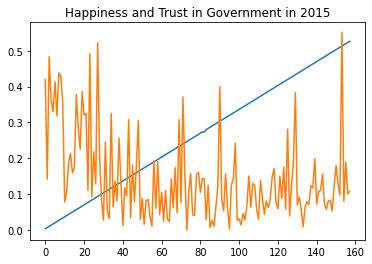

In [ ]:
plt.plot(whr_2015['Happiness Rank']/300)
plt.plot(whr_2015['Trust (Government Corruption)'])
plt.title("Happiness and Trust in Government in 2015");

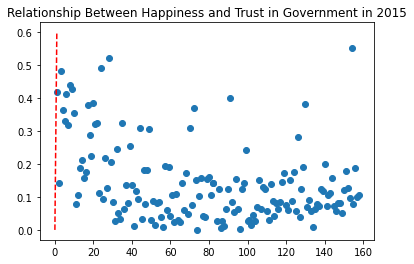

In [ ]:
plt.scatter(whr_2015['Happiness Rank'], whr_2015['Trust (Government Corruption)'])
plt.title("Relationship Between Happiness and Trust in Government in 2015")
plt.plot((0, 0.6), "r--");

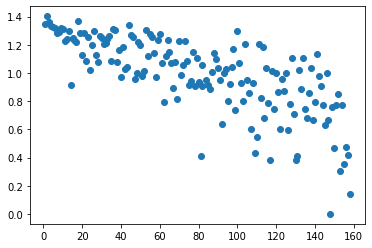

In [ ]:
plt.scatter(whr_2015['Happiness Rank'], whr_2015['Family'])

In [ ]:
final_df = whr_2015.append([whr_2016, whr_2017, whr_2018, whr_2019, whr_2020], ignore_index=True)[column].copy()
happiness_rank_year = final_df[['Country', 'Happiness Rank', 'Year']]
happiness_rank_year

,Country,Happiness Rank,Year
0,Switzerland,1,2015
1,Iceland,2,2015
2,Denmark,3,2015
3,Norway,4,2015
4,Canada,5,2015
...,...,...,...
930,Central African Republic,149,2020
931,Rwanda,150,2020
932,Zimbabwe,151,2020
933,South Sudan,152,2020


In [ ]:
whr_lt = get_country_rows(all_whr, 'Country', 'Lithuania', column)
whr_ger = get_country_rows(all_whr, 'Country', 'Germany', column)
whr_lv = get_country_rows(all_whr, 'Country', 'Latvia', column)
whr_es = get_country_rows(all_whr, 'Country', 'Estonia', column)

comparing_countries = [whr_es, whr_ger, whr_lt, whr_lv]

In [ ]:
whr_lt

,Country,Happiness Rank,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Lithuania,56,1.147230,0.731280,0.213420,0.010310,0.026410,2015
1,Lithuania,60,1.269200,0.646740,0.189290,0.018200,0.020250,2016
2,Lithuania,52,1.314582,0.628950,0.234232,0.011866,0.010165,2017
3,Lithuania,50,1.197000,0.716000,0.350000,0.006000,0.026000,2018
4,Lithuania,42,1.238000,0.818000,0.291000,0.042000,0.043000,2019
5,Lithuania,41,10.343626,67.294075,0.747381,0.809584,-0.219725,2020


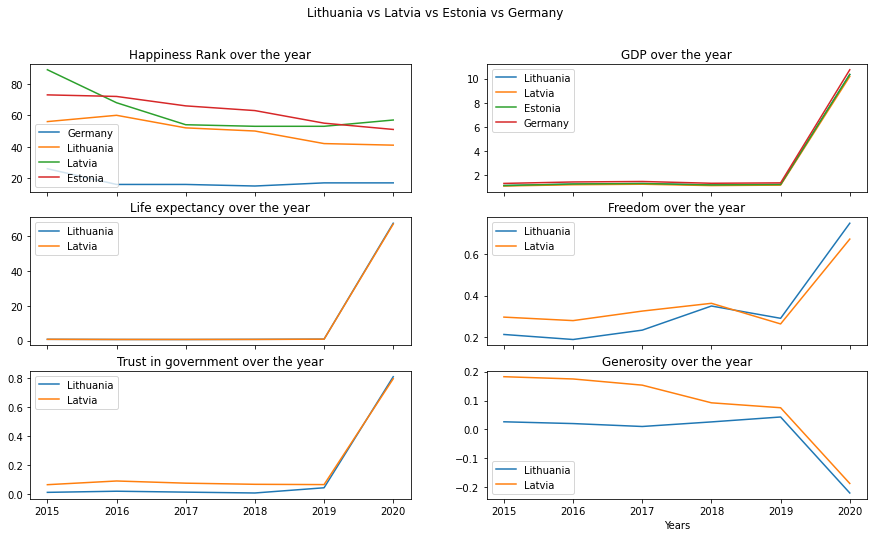

In [ ]:
years = whr_lt['Year']
fig, ax = plt.subplots(3, 2, figsize=(15, 8), sharex=True)
fig.suptitle('Lithuania vs Latvia vs Estonia vs Germany')
ax[0, 0].invert_yaxis
ax[0, 0].plot(years, whr_ger['Happiness Rank'], label='Germany')
ax[0, 0].plot(years, whr_lt['Happiness Rank'], label='Lithuania')
ax[0, 0].plot(years, whr_lv['Happiness Rank'], label='Latvia')
ax[0, 0].plot(years, whr_es['Happiness Rank'], label='Estonia')
ax[0, 0].legend(loc='best')
ax[0, 0].set_title('Happiness Rank over the year')
ax[0, 1].plot(years, whr_lt['Economy (GDP per Capita)'], label='Lithuania')
ax[0, 1].plot(years, whr_lv['Economy (GDP per Capita)'], label='Latvia')
ax[0, 1].plot(years, whr_es['Economy (GDP per Capita)'], label='Estonia')
ax[0, 1].plot(years, whr_ger['Economy (GDP per Capita)'], label='Germany')
ax[0, 1].set_title('GDP over the year')
ax[0, 1].legend(loc='best')
ax[1, 0].plot(years, whr_lt['Health (Life Expectancy)'], label='Lithuania')
ax[1, 0].plot(years, whr_lv['Health (Life Expectancy)'], label='Latvia')
ax[1, 0].set_title('Life expectancy over the year')
ax[1, 0].legend(loc='best')
ax[1, 1].plot(years, whr_lt['Freedom'], label='Lithuania')
ax[1, 1].plot(years, whr_lv['Freedom'], label='Latvia')
ax[1, 1].set_title('Freedom over the year')
ax[1, 1].legend(loc='best')
ax[2, 0].plot(years, whr_lt['Trust (Government Corruption)'], label='Lithuania')
ax[2, 0].plot(years, whr_lv['Trust (Government Corruption)'], label='Latvia')
ax[2, 0].set_title('Trust in government over the year')
ax[2, 0].legend(loc='best')
ax[2, 1].plot(years, whr_lt['Generosity'], label='Lithuania')
ax[2, 1].plot(years, whr_lv['Generosity'], label='Latvia')
ax[2, 1].set_title('Generosity over the year')
ax[2, 1].set_xlabel('Years')
ax[2, 1].legend(loc='best')

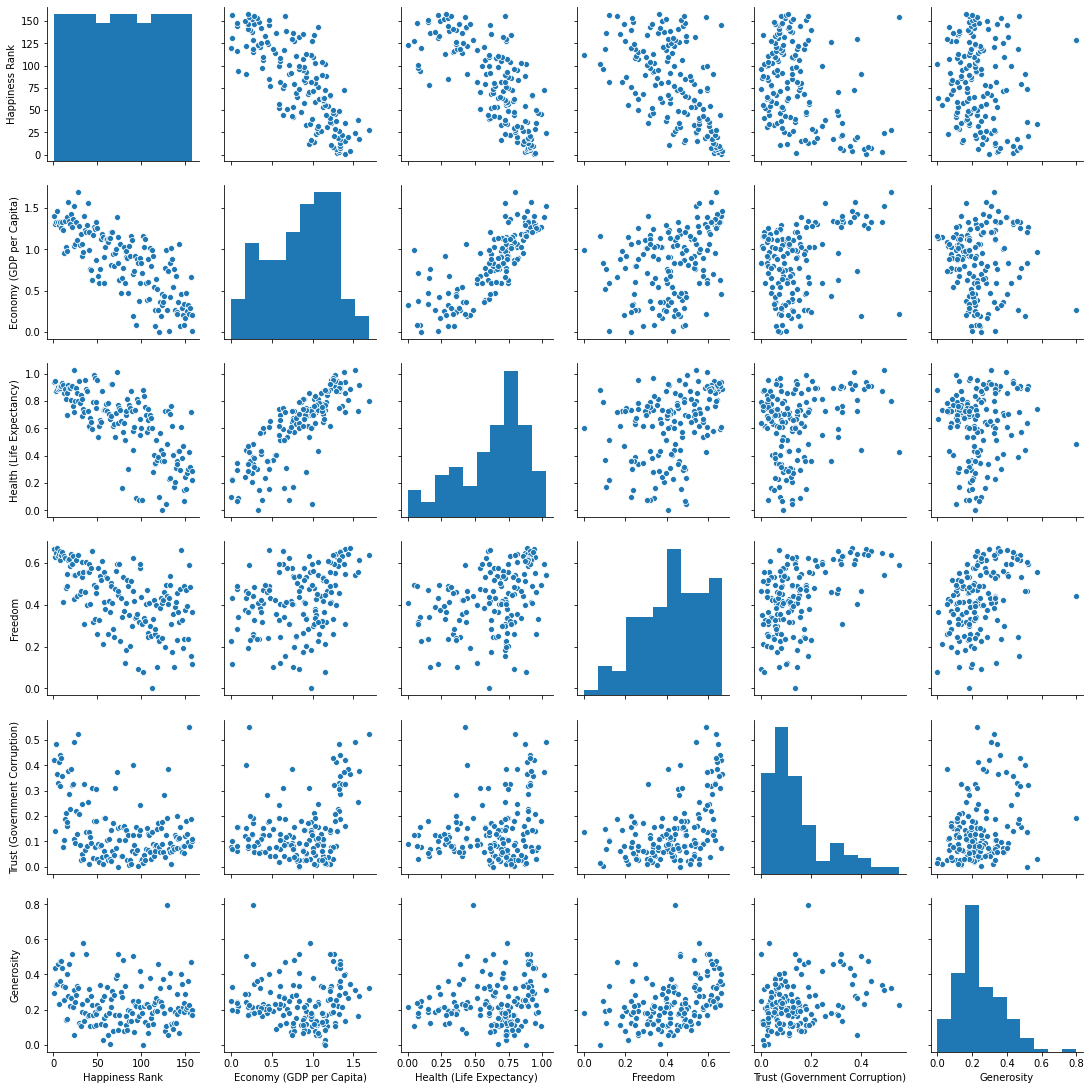

In [ ]:
sns.pairplot(whr_2015[column].drop('Year', axis=1))

## Connecting all dataframes

In [ ]:
dates = {0: 2015, 1: 2016, 2:2017, 3:2018, 4:2019, 5:2020}

In [ ]:
group_countries = final_df.groupby(['Country'])

In [ ]:
top_countries = whr_2015.Country[:10].tolist()

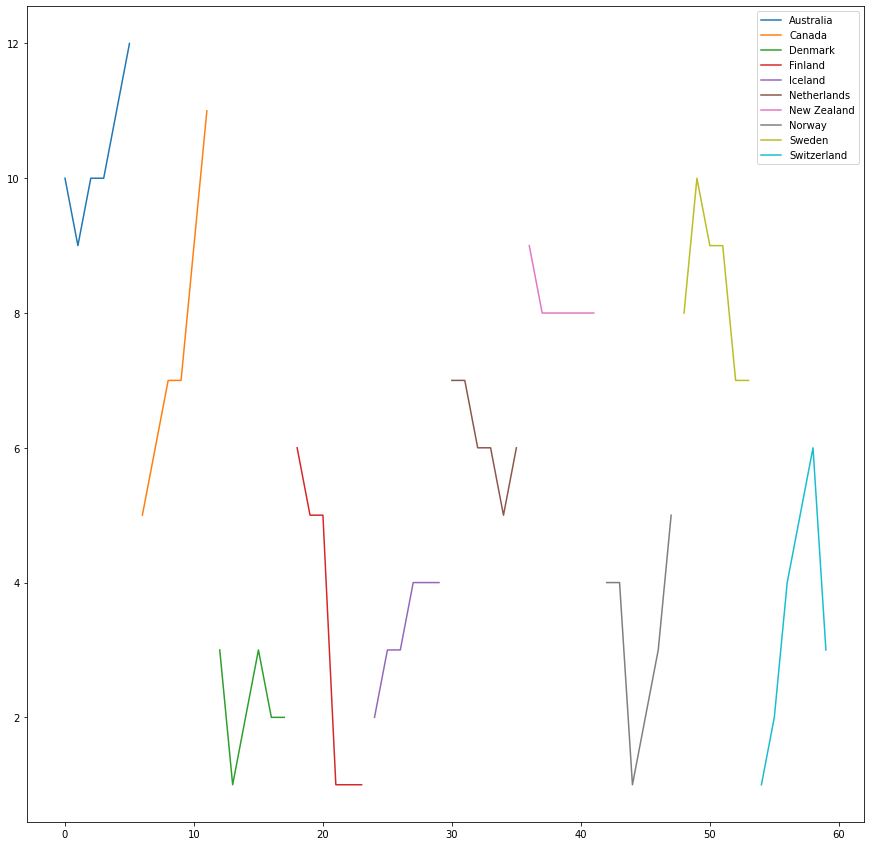

In [ ]:
#final_df.set_index('Date', inplace=True)
plt.figure()  
countries = whr_2015.Country
top = pd.DataFrame(columns=['Country', 'Happiness Rank', 'Year'])
for name, group in final_df.groupby('Country'):
  #['Happiness Rank'].plot(legend=True, x='Date', figsize=(40, 40));
  if name in top_countries:
    group_hr = group[['Country', 'Happiness Rank', 'Year']]
    top = top.append(group_hr, ignore_index=True)
top.groupby('Country')['Happiness Rank'].plot(legend=True, x='Date', figsize=(15, 15));

In [ ]:
top_counties

In [ ]:
country_bn.shape

## Joining with shapefile

In [ ]:
all_whr_countries = all_countries(all_whr, 'Country')

In [ ]:
not_needed_countries(country_bn.Country, all_whr_countries)

In [ ]:
whr_2015.loc[whr_2015.Country == 'Russia']

In [ ]:
country_bn.loc[country_bn.Country == 'Russian Federation']  

,Country,geometry
246,Russian Federation,"MULTIPOLYGON (((-179.99999 68.98010, -179.9580..."


In [ ]:
country_bn.at[246, 'Country'] = 'Russia'

In [ ]:
delete_countries = not_needed_countries(country_bn.Country, all_whr_countries)
delete_countries

['American Samoa',
 'United States Minor Outlying Islands',
 'Cook Islands',
 'French Polynesia',
 'Niue',
 'Pitcairn',
 'Samoa',
 'Tokelau',
 'Tonga',
 'Wallis and Futuna',
 'Falkland Islands',
 'South Georgia and South Sandwich Islands',
 'Antarctica',
 'Fiji',
 'Saint Helena',
 'Anguilla',
 'Antigua and Barbuda',
 'Aruba',
 'Bahamas',
 'Barbados',
 'Bermuda',
 'Bonaire',
 'British Virgin Islands',
 'Cayman Islands',
 'Cuba',
 'Curacao',
 'Dominica',
 'French Guiana',
 'Grenada',
 'Guadeloupe',
 'Guyana',
 'Martinique',
 'Montserrat',
 'Saba',
 'Saint Barthelemy',
 'Saint Eustatius',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Martin',
 'Saint Pierre and Miquelon',
 'Saint Vincent and the Grenadines',
 'Sint Maarten',
 'Turks and Caicos Islands',
 'US Virgin Islands',
 'Cabo Verde',
 "Côte d'Ivoire",
 'Gibraltar',
 'Guinea-Bissau',
 'Greenland',
 'Guernsey',
 'Isle of Man',
 'Jersey',
 'Faroe Islands',
 'Svalbard',
 'Bouvet Island',
 'Congo',
 'Congo DRC',
 'Juan De Nova Island

In [ ]:
country_bn = delete_rows(country_bn, delete_countries)
country_bn

,index,Country,geometry
0,10,El Salvador,"POLYGON ((-87.69467 13.81901, -87.72501 13.733..."
1,11,Guatemala,"POLYGON ((-89.34831 14.43198, -89.43556 14.414..."
2,12,Mexico,"MULTIPOLYGON (((-111.56001 24.42945, -111.5761..."
3,13,Canada,"MULTIPOLYGON (((-87.03528 65.47915, -87.06368 ..."
4,14,Argentina,"MULTIPOLYGON (((-71.85916 -41.01128, -71.83806..."
...,...,...,...
150,237,South Korea,"MULTIPOLYGON (((126.86922 36.06060, 126.85910 ..."
151,238,Mongolia,"POLYGON ((116.67180 46.32724, 116.58554 46.295..."
152,241,Japan,"MULTIPOLYGON (((134.29938 34.70412, 134.25027 ..."
153,246,Russia,"MULTIPOLYGON (((-179.99999 68.98010, -179.9580..."


In [ ]:
leftout_countries(country_bn, 'Country', all_whr_countries)

['Taiwan',
 'North Cyprus',
 'Kosovo',
 'Hong Kong',
 'Somaliland region',
 'Macedonia',
 'Swaziland',
 'Palestinian Territories',
 'Congo (Kinshasa)',
 'Congo (Brazzaville)',
 'Ivory Coast',
 'Somaliland Region',
 'Taiwan Province of China',
 'Hong Kong S.A.R., China',
 'Trinidad & Tobago',
 'Northern Cyprus',
 'Hong Kong S.A.R. of China']

In [ ]:
for whr in all_whr:
  for iter, row in whr.iterrows():
    if whr.loc[iter, 'Country'] == 'Congo (Kinshasa)':
      whr.at[iter, 'Country'] = 'Congo DRC'
    elif whr.loc[iter, 'Country'] == 'Congo (Brazzaville)':
      whr.at[iter, 'Country'] = 'Congo'

In [ ]:
all_whr_countries = all_countries(all_whr, 'Country')
all_whr_countries

['Switzerland',
 'Iceland',
 'Denmark',
 'Norway',
 'Canada',
 'Finland',
 'Netherlands',
 'Sweden',
 'New Zealand',
 'Australia',
 'Israel',
 'Costa Rica',
 'Austria',
 'Mexico',
 'United States',
 'Brazil',
 'Luxembourg',
 'Ireland',
 'Belgium',
 'United Arab Emirates',
 'United Kingdom',
 'Oman',
 'Venezuela',
 'Singapore',
 'Panama',
 'Germany',
 'Chile',
 'Qatar',
 'France',
 'Argentina',
 'Czech Republic',
 'Uruguay',
 'Colombia',
 'Thailand',
 'Saudi Arabia',
 'Spain',
 'Malta',
 'Taiwan',
 'Kuwait',
 'Suriname',
 'Trinidad and Tobago',
 'El Salvador',
 'Guatemala',
 'Uzbekistan',
 'Slovakia',
 'Japan',
 'South Korea',
 'Ecuador',
 'Bahrain',
 'Italy',
 'Bolivia',
 'Moldova',
 'Paraguay',
 'Kazakhstan',
 'Slovenia',
 'Lithuania',
 'Nicaragua',
 'Peru',
 'Belarus',
 'Poland',
 'Malaysia',
 'Croatia',
 'Libya',
 'Russia',
 'Jamaica',
 'North Cyprus',
 'Cyprus',
 'Algeria',
 'Kosovo',
 'Turkmenistan',
 'Mauritius',
 'Hong Kong',
 'Estonia',
 'Indonesia',
 'Vietnam',
 'Turkey',
 'Ky

In [ ]:
delete_countries = not_needed_countries(country_bn.Country, all_whr_countries)
delete_countries

[]

In [ ]:
country_bn = delete_rows(country_bn, delete_countries)
country_bn

,level_0,index,Country,geometry
0,0,10,El Salvador,"POLYGON ((-87.69467 13.81901, -87.72501 13.733..."
1,1,11,Guatemala,"POLYGON ((-89.34831 14.43198, -89.43556 14.414..."
2,2,12,Mexico,"MULTIPOLYGON (((-111.56001 24.42945, -111.5761..."
3,3,13,Canada,"MULTIPOLYGON (((-87.03528 65.47915, -87.06368 ..."
4,4,14,Argentina,"MULTIPOLYGON (((-71.85916 -41.01128, -71.83806..."
...,...,...,...,...
150,150,237,South Korea,"MULTIPOLYGON (((126.86922 36.06060, 126.85910 ..."
151,151,238,Mongolia,"POLYGON ((116.67180 46.32724, 116.58554 46.295..."
152,152,241,Japan,"MULTIPOLYGON (((134.29938 34.70412, 134.25027 ..."
153,153,246,Russia,"MULTIPOLYGON (((-179.99999 68.98010, -179.9580..."


In [ ]:
leftout_countries(country_bn, 'Country', all_whr_countries)

['Taiwan',
 'North Cyprus',
 'Kosovo',
 'Hong Kong',
 'Somaliland region',
 'Macedonia',
 'Swaziland',
 'Palestinian Territories',
 'Congo DRC',
 'Congo',
 'Ivory Coast',
 'Somaliland Region',
 'Taiwan Province of China',
 'Hong Kong S.A.R., China',
 'Trinidad & Tobago',
 'Northern Cyprus',
 'Hong Kong S.A.R. of China']

## Drawing the map

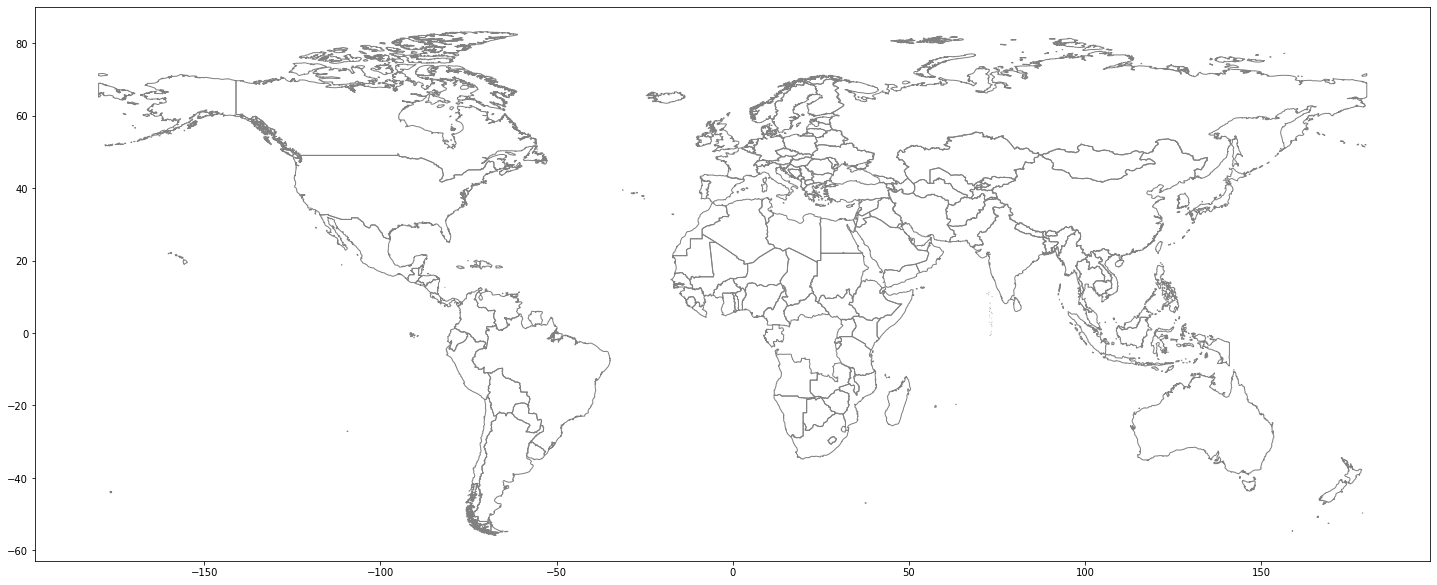

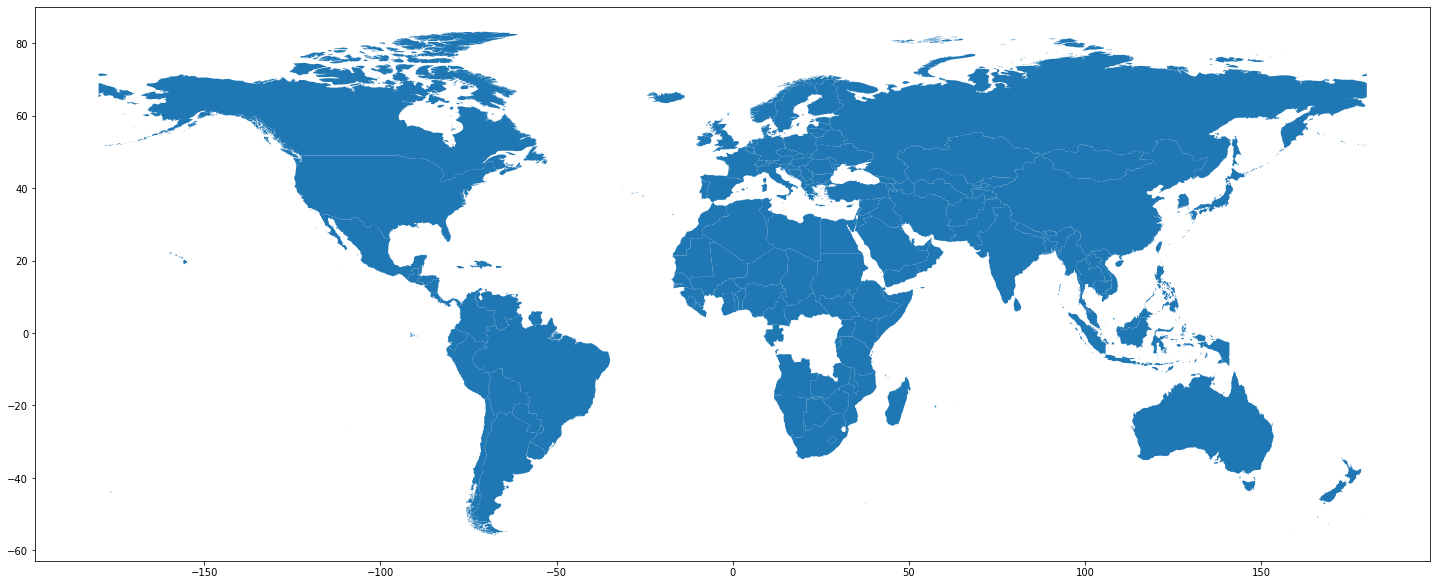

In [ ]:
ax = country_bn.plot(figsize=(25, 25), color='none', edgecolor='grey', zorder=2)
country_bn.plot(figsize=(25, 25));

In [ ]:
happiness_df_color = add_color(final_df, '#ffaa00')
happiness_df_color

color: 16755200


,Country,Happiness Rank,Date,Color
0,Switzerland,1,2015,0xffaa00
1,Iceland,2,2015,0xffa9fb
2,Denmark,3,2015,0xffa9f6
3,Norway,4,2015,0xffa9f1
4,Canada,5,2015,0xffa9ec
...,...,...,...,...
930,Central African Republic,149,2020,0xff97d6
931,Rwanda,150,2020,0xff97d1
932,Zimbabwe,151,2020,0xff97cc
933,South Sudan,152,2020,0xff97c7


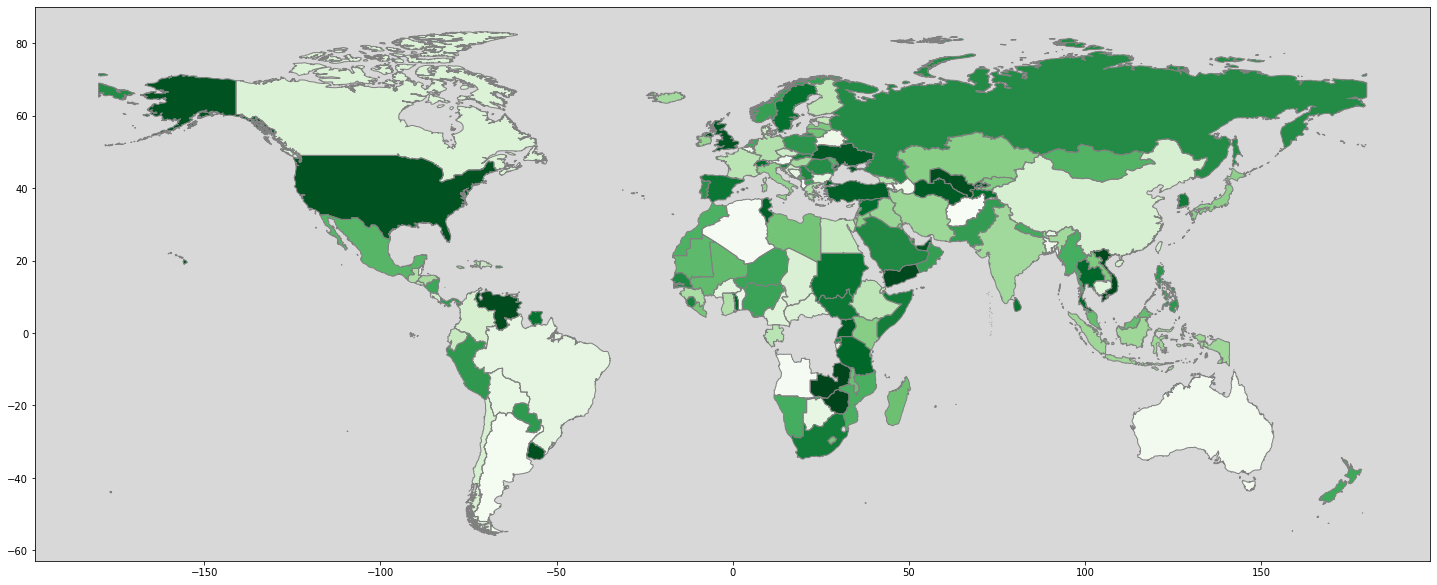

In [ ]:
ax = country_bn.plot(figsize=(25, 25), color='none', edgecolor='grey', zorder=2)
ax.set_facecolor('#D8D8D8')
country_happiness_mean = happiness_rank_year.groupby('Country').mean()
countries = gpd.GeoDataFrame(country_happiness_mean.merge(country_bn, on='Country'))
countries.plot(figsize=(30,30), cmap='Greens', ax=ax, column='Country')

In [ ]:
whr_2020.loc[whr_2020['Country'] == 'United States']

,Country,Regional indicator,Ladder score,Standard Error,upperwhisker,lowerwhisker,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia Residual,Happiness Rank
17,United States,North America and ANZ,6.9396,0.047316,7.03234,6.84686,10.925769,0.914219,68.2995,0.84262,0.149892,0.699715,1.972317,1.373987,1.404787,0.831618,0.534608,0.298143,0.152285,2.344125,18
